In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
# import lazypredict

from plotly.subplots import make_subplots
import plotly.graph_objects as go
import warnings
warnings.filterwarnings("ignore")

import statsmodels.tsa.stattools as st
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.arima.model import ARIMA

In [60]:
df = pd.read_csv('Data/Cambodia.csv',  index_col='Year')
print(df.shape)  # (123, 8)
df

(172, 10)


,Country,ISO 3166-1 alpha-3,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
Year,,,,,,,,,,
1850,Cambodia,KHM,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000
1851,Cambodia,KHM,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000
1852,Cambodia,KHM,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000
1853,Cambodia,KHM,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000
1854,Cambodia,KHM,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...
2017,Cambodia,KHM,12.504842,3.612704,6.591536,0.0,2.300602,0.000000,0.0,0.789911
2018,Cambodia,KHM,14.388181,3.839872,7.232736,0.0,3.315573,0.000000,0.0,0.897845
2019,Cambodia,KHM,18.024641,4.418784,8.280640,0.0,5.325217,0.000000,0.0,1.112100


In [61]:
#  plot to see total emission versus year for 'Germany'
fig_ger = px.line(df, x=df.index, y="Total")
fig_ger.update_xaxes(rangeslider_visible=True)
fig_ger.show()

Visualize the time series

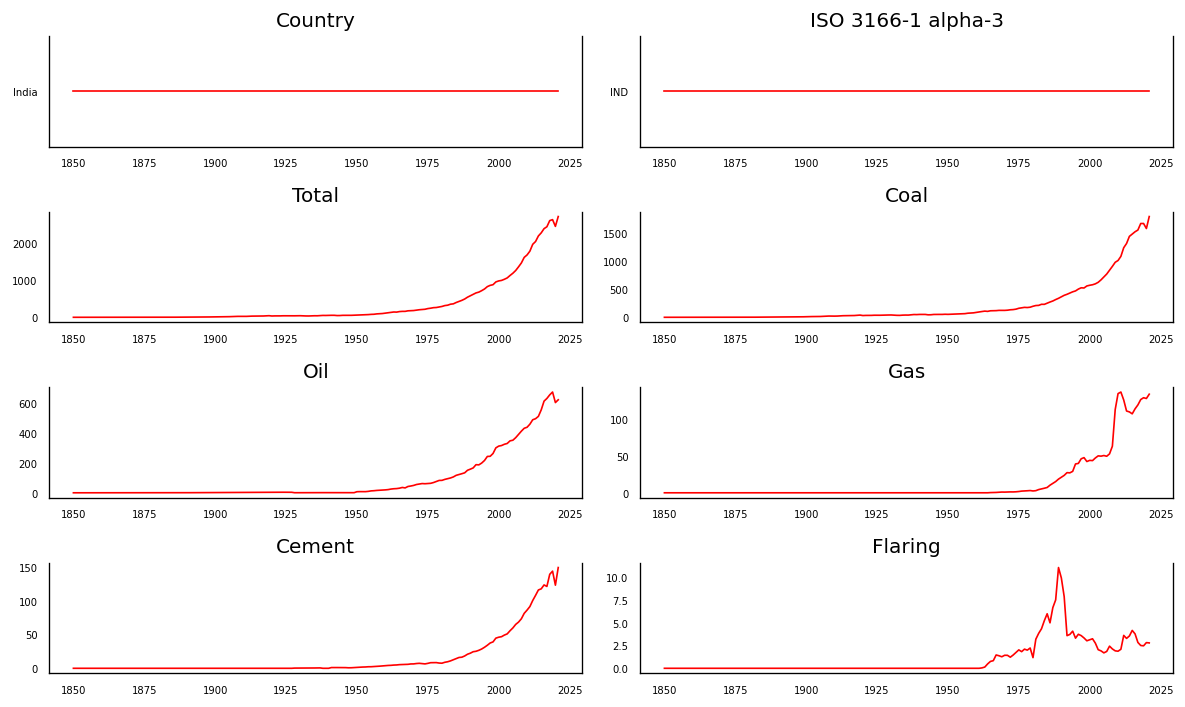

In [53]:
# Plot
fig, axes = plt.subplots(nrows=4, ncols=2, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = df[df.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(df.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

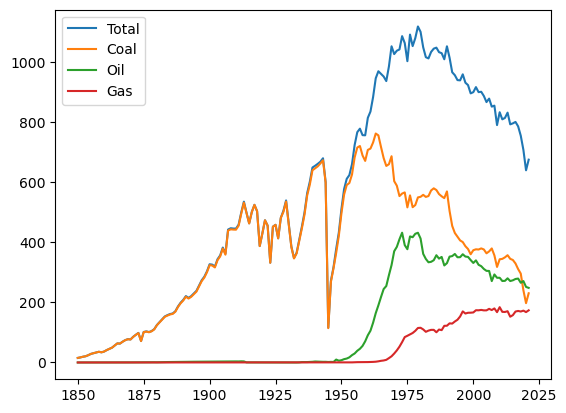

In [46]:
plt.figure()

x = df.index
y1 = df['Total']
y2 = df['Coal']
y3 = df['Oil']
y4 = df['Gas']

plt.plot(x,y1)
plt.plot(x,y2)
plt.plot(x,y3)
plt.plot(x,y4)


plt.legend(['Total', 'Coal', 'Oil', 'Gas'])

Grainger's Causality Test

In [ ]:
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=12
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_causation_matrix(df, variables = df.columns)   